In [129]:
from sklearn.neural_network import MLPClassifier

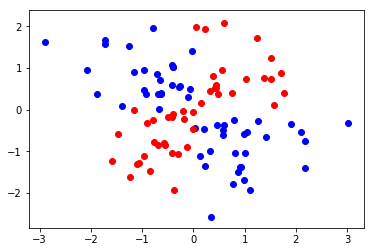

In [130]:
import numpy as np
from matplotlib import pyplot as plt
# 200개의 데이터, feature =2개
np.random.seed(30)
X=np.random.randn(100,2)  #rand =| randn : - 음수까지 섞음
y=np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y=np.where( y, 1, -1)
#y=np.where(y,-1,1)
plt.scatter(X[y== 1, 0], X[y== 1, 1],c='b')
plt.scatter(X[y==-1, 0], X[y==-1, 1],c='r')
plt.show()

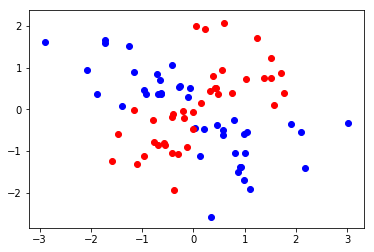

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   shuffle=True)
plt.scatter(X_train[y_train==1, 0],
            X_train[y_train==1, 1], c='b')
plt.scatter(X_train[y_train==-1, 0],
            X_train[y_train==-1, 1], c='r')
plt.show()

In [132]:
model_pctr = MLPClassifier(hidden_layer_sizes=(1,)) #hidden layer, node 는 1개

In [133]:
model_pctr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(1,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [134]:
model_pctr.score(X_test, y_test)

0.3

In [135]:
model_pctr.score(X_train, y_train)

0.4875

### multi_layer perception

In [136]:
model_pctr2= MLPClassifier(hidden_layer_sizes=(100,10)).fit(X_train, y_train)
                           #100개의 node로 10층 쌓음   2개의 input X hidden layer=200개 

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [137]:
model_pctr2.fit(X_train,y_train)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [138]:
model_pctr2.score(X_train, y_train)

0.9625

In [139]:
model_pctr2.score(X_test, y_test)

0.9

### parameter  
   
- activation  
1) default : ReLU  
2) logistic  
3) tanh (sigmoid의 일종)    -1부터 1까지 가는 차이
4) identity : Linear  
    
- Solver  
1) default : adam  
2) lbfgs  
3) sgd : stochastic(확률적) gradient decent  
  
-  alpha : L2 norm 규제 정도 (Ridge Regression과 동일)  
  
- tol : cost가 학습을 멈추는 기준, (cost = tol이 될 때 까지 (최저 경계 값)  
- max_iter : optimizing 최대 반복 수  



In [140]:
len(model_pctr2.coefs_) #총 3층짜리

3

In [141]:
for i, coef in enumerate(model_pctr2.coefs_):     #list
    print('hidden_layer_{}_weight_no: {}'.format(i, coef.shape))

hidden_layer_0_weight_no: (2, 100)
hidden_layer_1_weight_no: (100, 10)
hidden_layer_2_weight_no: (10, 1)


In [142]:
model_pctr2.coefs_[0].shape  #coef의 갯수 위에 200개 shape 찍으면 이런모습

(2, 100)

In [143]:
model_pctr2.intercepts_

[array([ 0.01817415, -0.01151316, -0.0023808 ,  0.21177438,  0.0015331 ,
        -0.21011523, -0.19798154,  0.01172147, -0.09183525,  0.00338827,
         0.32922053, -0.0607712 ,  0.17932708,  0.29617663, -0.0535333 ,
         0.14173012, -0.03153563,  0.15928588, -0.09126863, -0.01577238,
        -0.20024219,  0.02051885, -0.03094326,  0.04243962,  0.15145366,
         0.04438114,  0.10001758,  0.11126629,  0.17342544,  0.01325254,
         0.00584865, -0.04480908, -0.00265094,  0.08178708, -0.21322191,
         0.29688662, -0.26863971,  0.19317341, -0.02722368,  0.0760968 ,
         0.15070449, -0.08350845, -0.23981174,  0.04388708,  0.28285465,
         0.03120731,  0.05510514, -0.06383098, -0.02632742,  0.0236326 ,
         0.33415623,  0.26646983, -0.04900213,  0.0155605 ,  0.15194184,
         0.02540118,  0.01054184, -0.0036798 ,  0.04905538, -0.00120873,
         0.00313538,  0.05092093,  0.03556719,  0.08743802, -0.05602054,
        -0.02064188,  0.12102528, -0.04446058,  0.1

In [144]:
#각 층의 bias 개수
for i, bias in enumerate(model_pctr2.intercepts_):
    print('hidden_layer_{}_weight_no: {}'.format(i, bias.shape))

hidden_layer_0_weight_no: (100,)
hidden_layer_1_weight_no: (10,)
hidden_layer_2_weight_no: (1,)


In [145]:
#학습하는 동안 optimization 반복 횟수
model_pctr2.n_iter_

200

In [146]:
#layer 개수
model_pctr2.n_layers_

4

In [147]:
#output node 수
model_pctr2.n_outputs_

1

In [158]:
# graph, dataset 확장 패키지--->그래프를 그려주거나, dataset 갖다쓸떄 씀 sklearn에 원래 있던 기능 갖다 쓰는 명령어
import mglearn

def result_visualization(model, X, y):
    mglearn.plots.plot_2d_separator(model, X,
                                    fill=True, alpha=.1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


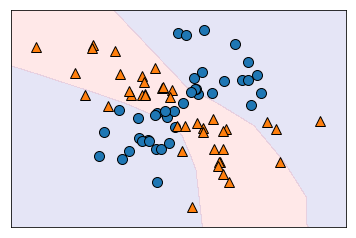

In [168]:
model_1 = MLPClassifier(hidden_layer_sizes=(10, 5)).fit(X_train,
                                                          y_train)
result_visualization(model_1, X_train, y_train)

-  파라미터를 변경해보자

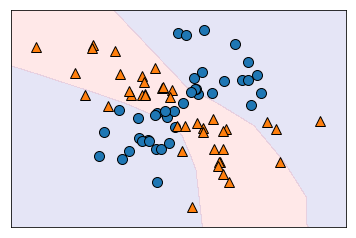

In [169]:
model_2= MLPClassifier(tol=0.00000000001,
                       hidden_layer_sizes=(10, 5),
                       activation='tanh',
                       max_iter=1000000000000,
                       alpha=10).fit(X,y)
result_visualization(model_1, X_train, y_train)
#tanh은 sigmid라 각짐

### ReLU와 SIG

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


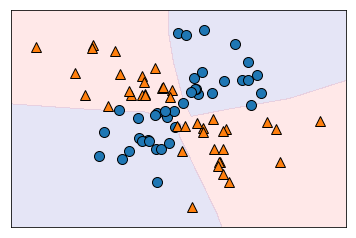

In [170]:
model_1 = MLPClassifier(hidden_layer_sizes=(10,5)).fit(X_train,y_train)

result_visualization(model_1, X_train, y_train)

Relu와 tanh의 비교
-  tanh의 decision boundary가 더 부드럽다

- relu의 decision boundary를 부드럽게 만들고 싶다면?   
층과 층의 노드 수를 늘리자

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


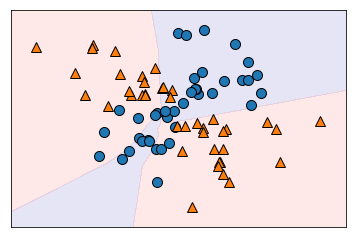

In [171]:
model_3=MLPClassifier(hidden_layer_sizes=(10,10,5)).fit(X_train,y_train)
result_visualization(model_3,X_train,y_train)

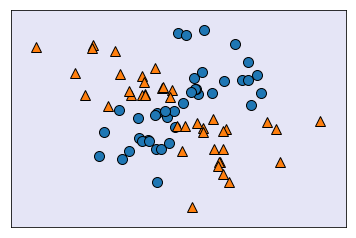

In [172]:
model_4 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                       activation='logistic').fit(X_train, y_train)
result_visualization(model_4, X_train, y_train)

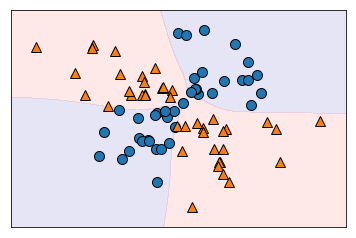

In [173]:
model_5 = MLPClassifier(hidden_layer_sizes=(10, 10, 5),
                       activation='logistic',
                       solver='lbfgs').fit(X_train, y_train)
result_visualization(model_5, X_train, y_train)

activation을 logistic으로 할때는 solver가 adam보다 lbfgs가 더 낫다.

C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


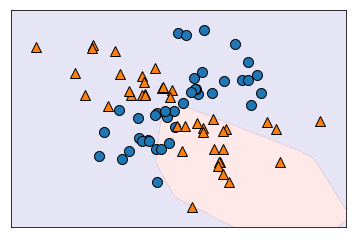

In [176]:
model_6=MLPClassifier(hidden_layer_sizes=(10),
                     activation='relu',
                     alpha=100).fit(X_train,y_train)
result_visualization(model_6, X_train, y_train)                    

alpha를 크게 줄 수록 (규제를 강하게 할 수록)  
decision boundary는 각이 진다.